<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/IBMQuantumPlatform_Runtime_Sampler_Primitives_BellState_Qiskit_1_2_4_mkbahk_20250707.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Install Qiskit

In [ ]:
!pip install qiskit[visualization]==1.2.4
!pip install qiskit-ibm-runtime==0.31.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=290197ed979a8b668b80879482767f5f02579b0b82af7412674dd98b0c60f5ab
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

##Step 1. Set up an Quantum Runtime Service channel

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_cloud", token="API-Key is Here", instance="CRN is here")

In [ ]:
#from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
#QiskitRuntimeService.save_account(
#    channel="ibm_cloud",
#    token="",
#    instance="",
#    # Explicitly set instance to None for ibm_cloud channel
#    # Use `overwrite=True` if you're updating your token.
#    overwrite=True,
#)

# Load saved credentials
#service = QiskitRuntimeService()

In [ ]:
print(service.backends())

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_sherbrooke')>, <IBMBackend('ibm_torino')>]


In [ ]:
#backend = service.backends()[0]
#backend = service.least_busy(operational=True, simulator=False)
#backend = service.backend("ibm_brisbane")
#backend = service.backend("ibmq_qasm_simulator")
#backend = service.backend("simulator_statevector")
#backend = service.backend("simulator_mps")
#backend = service.backend("simulator_stabilizer")
backend = service.backend("ibm_torino")

In [ ]:
print(backend)

<IBMBackend('ibm_torino')>


In [ ]:
import numpy as np
from qiskit.circuit.library import IQP
from qiskit.quantum_info import random_hermitian
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler
from qiskit_ibm_runtime import QiskitRuntimeService

In [ ]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()

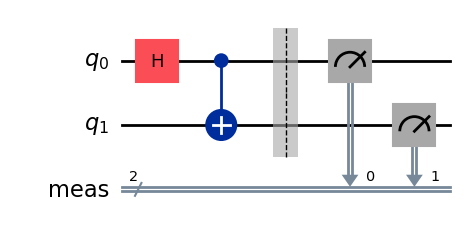

In [ ]:
circuit.draw("mpl")

In [ ]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)

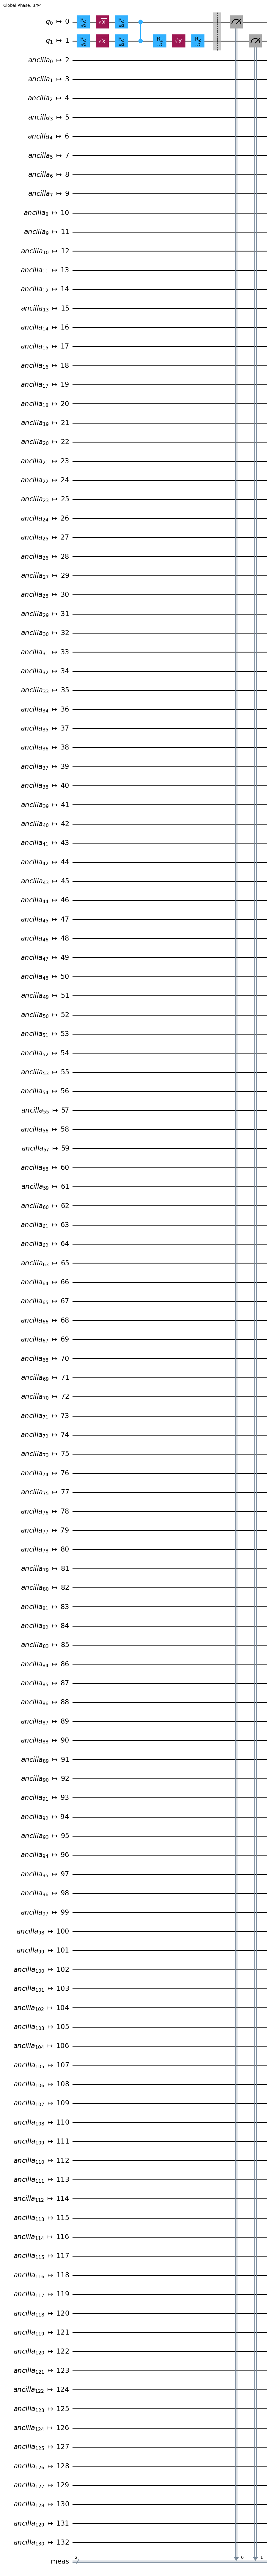

In [ ]:
isa_circuit.draw("mpl")

In [ ]:
sampler = Sampler(mode=backend)
job = sampler.run([isa_circuit],shots=1024)
print(job.job_id)

<bound method BasePrimitiveJob.job_id of <RuntimeJobV2('d1llhhr9fb3c73ehsbeg', 'sampler')>>


In [ ]:
print(job.status())

DONE


In [ ]:
result = job.result()

In [ ]:
result

PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=1024, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([{'__type__': 'DoubleSliceSpan', '__value__': {'start': datetime.datetime(2025, 7, 7, 5, 19, 5, 112844), 'stop': datetime.datetime(2025, 7, 7, 5, 19, 6, 276423), 'data_slices': {'0': [[1024], 0, 1, 0, 1024]}}}])}, 'version': 2})

In [ ]:
# first job
print(f" > Counts for job 1: {result[0].data.meas.get_counts()}")

 > Counts for job 1: {'10': 96, '11': 428, '01': 53, '00': 447}


In [ ]:
count= result[0].data.meas.get_counts()

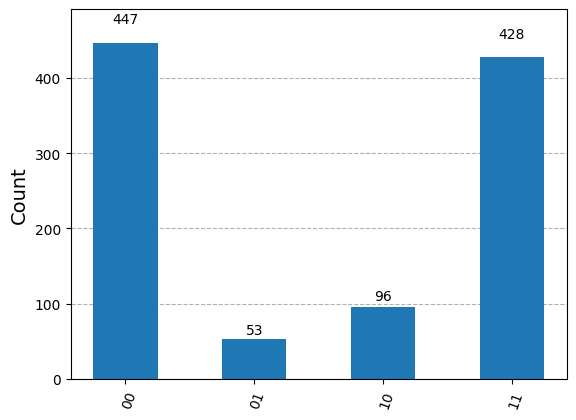

In [ ]:
# prompt: 위의 count값을 이용해서 히스토그램을 표현해 주세요.

from qiskit.visualization import plot_histogram
plot_histogram(count)
